<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Concept-of-the-$k$-Nearest-Neighbors-Algorithm" data-toc-modified-id="Concept-of-the-$k$-Nearest-Neighbors-Algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Concept of the $k$-Nearest Neighbors Algorithm</a></span><ul class="toc-item"><li><span><a href="#Who's-Nearby?" data-toc-modified-id="Who's-Nearby?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Who's Nearby?</a></span></li><li><span><a href="#Summary-of-$k$NN" data-toc-modified-id="Summary-of-$k$NN-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Summary of $k$NN</a></span></li><li><span><a href="#Implementing-in-Scikit-Learn" data-toc-modified-id="Implementing-in-Scikit-Learn-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Implementing in Scikit-Learn</a></span><ul class="toc-item"><li><span><a href="#Training-the-KNN" data-toc-modified-id="Training-the-KNN-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Training the KNN</a></span></li><li><span><a href="#Make-Some-Predictions" data-toc-modified-id="Make-Some-Predictions-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Make Some Predictions</a></span></li></ul></li></ul></li><li><span><a href="#The-Pros-and-Cons" data-toc-modified-id="The-Pros-and-Cons-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Pros and Cons</a></span><ul class="toc-item"><li><span><a href="#Advantages" data-toc-modified-id="Advantages-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Advantages</a></span></li><li><span><a href="#Disadvantages" data-toc-modified-id="Disadvantages-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Disadvantages</a></span></li></ul></li><li><span><a href="#Classification-with-sklearn.neighbors" data-toc-modified-id="Classification-with-sklearn.neighbors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification with <code>sklearn.neighbors</code></a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Train-Test Split</a></span></li><li><span><a href="#Validation-Split" data-toc-modified-id="Validation-Split-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Validation Split</a></span></li><li><span><a href="#Different-$k$-Values" data-toc-modified-id="Different-$k$-Values-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Different $k$ Values</a></span><ul class="toc-item"><li><span><a href="#$k=1$" data-toc-modified-id="$k=1$-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>$k=1$</a></span></li><li><span><a href="#$k=3$" data-toc-modified-id="$k=3$-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>$k=3$</a></span></li><li><span><a href="#$k=5$" data-toc-modified-id="$k=5$-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>$k=5$</a></span></li><li><span><a href="#Observing-Different-$k$-Values" data-toc-modified-id="Observing-Different-$k$-Values-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Observing Different $k$ Values</a></span></li></ul></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Scaling</a></span><ul class="toc-item"><li><span><a href="#More-Resources-on-Scaling" data-toc-modified-id="More-Resources-on-Scaling-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>More Resources on Scaling</a></span></li></ul></li></ul></li><li><span><a href="#$k$-and-the-Bias-Variance-Tradeoff" data-toc-modified-id="$k$-and-the-Bias-Variance-Tradeoff-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>$k$ and the Bias-Variance Tradeoff</a></span><ul class="toc-item"><li><span><a href="#The-Relation-Between-$k$-and-Bias/Variance" data-toc-modified-id="The-Relation-Between-$k$-and-Bias/Variance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The Relation Between $k$ and Bias/Variance</a></span></li></ul></li><li><span><a href="#Level-Up:-Distance-Metrics" data-toc-modified-id="Level-Up:-Distance-Metrics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level Up: Distance Metrics</a></span></li></ul></div>

![wilson](images/wilson.jpg)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score, ConfusionMatrixDisplay
from src.k_classify import predict_one
from src.plot_train import *
from src.euclid import *

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold

# Objectives

- Describe the $k$-nearest neighbors algorithm
- Identify multiple common distance metrics
- Tune $k$ appropriately in response to models with high bias or variance

# Concept of the $k$-Nearest Neighbors Algorithm

First let's recall what is **supervised learning**.

> In **supervised learning** we use example data (_training data_) to inform our predictions of future data

Note that this definition includes _classification_ and _regression_ problems. And there are a variety of ways we  can make predictions from past data.

$k$-nearest neighbors is one such method of making predictions.

## Who's Nearby?

One strategy to make predictions on a new data is to just look at what _similar_ data points are like.

![](images/best_k_fs.png)

We can say _nearby_ points are _similar_ to one another. There are a few different wasy to determine how "close" data points are to one another. Check out the [Level Up section on distance metrics](#Level-Up:-Distance-Metrics) for some more detail.

## Summary of $k$NN

![](images/knn-process.png)

## Implementing in Scikit-Learn

> [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) & [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

Let's try doing some basic classification on some data using the KNN algorithms.

In [12]:
iris = sns.load_dataset('iris')
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
# Let's convert this over to NumPy array
X = iris.iloc[:, :2].to_numpy()  # select all rows and the first 2 columns
# Let's convert classes to numerical values
y = LabelEncoder().fit_transform(iris["species"])

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

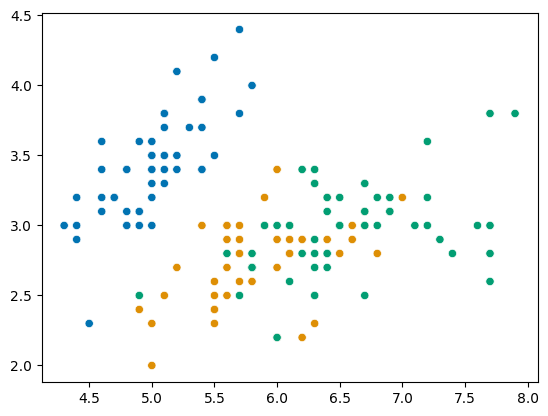

In [14]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax, hue=y, palette='colorblind')
ax.get_legend().remove()

### Training the KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(X, y)

### Make Some Predictions

In [ ]:
# Made up data points
pred_pts = np.array([
    [7.0, 3.0],
    [8.0, 3.5],
    [7.0, 4.0],
    [4.0, 3.0],
    [5.0, 3.0],
    [5.5, 4.0],
    [5.0, 2.0],
    [6.0, 2.5],
    [5.8, 3.5],
])

Let's see these new points against the training data. Think about how they'll be made classified.

In [ ]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax, hue=y, palette='colorblind')
sns.scatterplot(x=pred_pts[:, 0], ax=ax, y=pred_pts[:, 1], marker="*",
                s=200, edgecolor='black', color='magenta')
ax.get_legend().remove()

In [ ]:
# Make predictions
pred_y = neigh.predict(pred_pts)
print(pred_y)

In [ ]:
# Probabilities for KNN (how they voted)
for p,prob in zip(pred_y,neigh.predict_proba(pred_pts)):
    print(f'{p}: {prob}')

In [ ]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:, 0],y=X[:, 1], ax=ax, hue=y, palette='colorblind')
sns.scatterplot(x=pred_pts[:, 0], ax=ax, y=pred_pts[:, 1],
                hue=pred_y, palette='colorblind', marker="*", s=200, edgecolor='black')
ax.get_legend().remove()

Let's see those predictions plotted with the other points after the classification.

# The Pros and Cons

Models have different use cases and it helps to understand the strengths and weaknesses

## Advantages

- Lazy learning (no training phase)
- Simple algorithm to understand and implement

## Disadvantages

- Has to be kept in memory (small data with few features)
- Not robust; doesn't generalize well
- Soft boundaries are troublesome
- "Curse of Dimensionality"

# Classification with `sklearn.neighbors`

$k$-Nearest Neighbors is a modeling technique that works for both regression and classification problems. Here we'll apply it to a version of the Titanic dataset.

In [ ]:
titanic = pd.read_csv('data/cleaned_titanic.csv')
titanic = titanic.iloc[:, :-2]
titanic.head()

**For visualization purposes, we will use only two features for our first model.**

In [ ]:
X = titanic[['Age', 'Fare']]
y = titanic['Survived']
y.value_counts()

## Train-Test Split

This dataset of course presents a binary classification problem, with our target being the `Survived` feature.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)

## Validation Split

In [ ]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          random_state=42,
                                          test_size=0.25)

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_t, y_t)
print(f"training accuracy: {knn.score(X_t, y_t)}")
print(f"validation accuracy: {knn.score(X_val, y_val)}")

plot_confusion_matrix(estimator=knn, X=X_t, y_true=y_t, display_labels=['Perished', 'Survived'])
plot_confusion_matrix(estimator=knn, X=X_val, y_true=y_val, display_labels=['Perished', 'Survived']);

In [ ]:
X_for_viz = X_t.sample(15, random_state=40)
y_for_viz = y_t[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_for_viz['Age'], y=X_for_viz['Fare'],
                hue=y_for_viz, palette={0: 'red', 1: 'green'},
                s=200, ax=ax)

ax.set_xlim(0, 80)
ax.set_ylim(0, 80)
plt.legend()
plt.title('Subsample of Training Data');

The $k$-NN algorithm works by simply storing the training set in memory, then measuring the distance from the training points to a new point.

Let's drop a point from our validation set into the plot above.

In [ ]:
X_for_viz = X_t.sample(15, random_state=40)
y_for_viz = y_t[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=X_for_viz['Age'], y=X_for_viz['Fare'],
                hue=y_for_viz, palette={0: 'red', 1: 'green'},
                s=200, ax=ax)

plt.legend()

#################^^^Old code^^^##############
####################New code#################

# Let's take one sample from our validation set and plot it
new_x = pd.DataFrame(X_val.loc[484]).T
new_y = y_val[new_x.index]

sns.scatterplot(x=new_x['Age'], y=new_x['Fare'], color='blue',
                s=200, ax=ax, label='New', marker='P')

ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

In [ ]:
new_x

Then, $k$-NN finds the $k$ nearest points. $k$ corresponds to the `n_neighbors` parameter defined when we instantiate the classifier object. **If $k$ = 1, then the prediction for a point will simply be the value of the target for the nearest point.**

## Different $k$ Values

A big factor in this algorithm is choosing $k$

![](images/k_vs_errors.png)

### $k=1$

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

Let's fit our training data, then predict what our validation point will be based on the (one) closest neighbor.

In [ ]:
knn.fit(X_for_viz, y_for_viz)
knn.predict(new_x)

**When we raise the value of $k$, $k$-NN will act democratically: It will find the $k$ closest points, and take a vote based on the labels.**

### $k=3$

Let's raise $k$ to 3.

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn3.fit(X_for_viz, y_for_viz)
knn3.predict(new_x)

It's not easy to tell what which points are closest by eye.

Let's update our plot to add indices.

In [ ]:
X_for_viz = X_t.sample(15, random_state=40)
y_for_viz = y_t[X_for_viz.index]

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=X_for_viz['Age'], y=X_for_viz['Fare'], hue=y_for_viz,
                palette={0: 'red', 1: 'green'}, s=200, ax=ax)


# Now let's take another sample

# new_x = X_val.sample(1, random_state=33)
new_x = pd.DataFrame(X_val.loc[484]).T
new_x.columns = ['Age', 'Fare']
new_y = y_val[new_x.index]

print(new_x)
sns.scatterplot(x=new_x['Age'], y=new_x['Fare'], color='blue',
                s=200, ax=ax, label='New', marker='P')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.legend()

#################^^^Old code^^^##############
####################New code#################

# add annotations one by one with a loop
for index in X_for_viz.index:
    ax.text(X_for_viz.Age[index]+0.7, X_for_viz.Fare[index],
            s=index, horizontalalignment='left', size='medium',
            color='black', weight='semibold')

We can use `sklearn`'s NearestNeighors object to see the exact calculations.

In [ ]:
df_for_viz = pd.merge(X_for_viz, y_for_viz, left_index=True, right_index=True)
neighbor = NearestNeighbors(n_neighbors=3)
neighbor.fit(X_for_viz)
nearest = neighbor.kneighbors(new_x)

nearest

In [ ]:
df_for_viz.iloc[nearest[1][0]]

In [ ]:
new_x

In [ ]:
# Use Euclidean distance to see how close they are to this point
print(((29-24)**2 + (33-25.4667)**2)**0.5)
print(((26-24)**2 + (16.1-25.4667)**2)**0.5)
print(((20-24)**2 + (15.7417-25.4667)**2)**0.5)

### $k=5$

And with five neighbors?

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_for_viz, y_for_viz)
knn.predict(new_x)

### Observing Different $k$ Values

Let's iterate through $k$, odd numbers 1 through 10, and see the predictions.

In [ ]:
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_for_viz, y_for_viz)
    print(f'k={k}', knn.predict(new_x))

Which models were correct?

In [ ]:
new_y

## Scaling

You may have suspected that we were leaving something out. For any distance-based algorithms, scaling is very important. Look at how the shape of the array changes before and after scaling.

![non-normal](images/nonnormal.png)

![normal](images/normalized.png)

Let's look at our data_for_viz dataset:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          random_state=42,
                                          test_size=0.25)

knn = KNeighborsClassifier(n_neighbors=5)

ss = StandardScaler()
X_ind = X_t.index
X_col = X_t.columns

X_t_s = pd.DataFrame(ss.fit_transform(X_t))
X_t_s.index = X_ind
X_t_s.columns = X_col

X_v_ind = X_val.index
X_val_s = pd.DataFrame(ss.transform(X_val))
X_val_s.index = X_v_ind
X_val_s.columns = X_col

knn.fit(X_t_s, y_t)
print(f"training accuracy: {knn.score(X_t_s, y_t)}")
print(f"Val accuracy: {knn.score(X_val_s, y_val)}")

y_hat = knn.predict(X_val_s)

In [ ]:
# The plot_train() function just does what we did above.

plot_train(X_t, y_t, X_val, y_val)
plot_train(X_t_s, y_t, X_val_s, y_val, -2, 2, text_pos=0.1 )

Look at how much that changes things.

Look at points 166 and 150.  
Look at the group 621, 143, and 191.

Now let's run our classifier on scaled data and compare to unscaled.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.25)

# The predict_one() function prints predictions on a given point
# (#484) for k-nn models with k ranging from 1 to 10.

predict_one(X_t, X_val, y_t, y_val)

In [ ]:
mm = MinMaxScaler()

X_t_s = pd.DataFrame(mm.fit_transform(X_t))
X_t_s.index = X_t.index
X_t_s.columns = X_t.columns

X_val_s = pd.DataFrame(mm.transform(X_val))
X_val_s.index = X_val.index
X_val_s.columns = X_val.columns


predict_one(X_t_s, X_val_s, y_t, y_val)

### More Resources on Scaling

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html   
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

# $k$ and the Bias-Variance Tradeoff

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.25)

In [ ]:
# Let's slowly increase k and see what happens to our accuracy scores.

kf = KFold(n_splits=5)

k_scores_train = {}
k_scores_val = {}


for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_score_t = []
    accuracy_score_v = []
    for train_ind, val_ind in kf.split(X_train, y_train):

        X_t, y_t = X_train.iloc[train_ind], y_train.iloc[train_ind]
        X_v, y_v = X_train.iloc[val_ind], y_train.iloc[val_ind]
        mm = MinMaxScaler()

        X_t_ind = X_t.index
        X_v_ind = X_v.index

        X_t = pd.DataFrame(mm.fit_transform(X_t))
        X_t.index = X_t_ind
        X_v = pd.DataFrame(mm.transform(X_v))
        X_v.index = X_v_ind

        knn.fit(X_t, y_t)

        y_pred_t = knn.predict(X_t)
        y_pred_v = knn.predict(X_v)

        accuracy_score_t.append(accuracy_score(y_t, y_pred_t))
        accuracy_score_v.append(accuracy_score(y_v, y_pred_v))


    k_scores_train[k] = np.mean(accuracy_score_t)
    k_scores_val[k] = np.mean(accuracy_score_v)

In [ ]:
k_scores_train

In [ ]:
k_scores_val

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(list(k_scores_train.keys()), list(k_scores_train.values()),
        color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label='Train')
ax.plot(list(k_scores_val.keys()), list(k_scores_val.values()),
        color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label='Val')
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
plt.legend();

## The Relation Between $k$ and Bias/Variance

> Small $k$ values leads to overfitting, but larger $k$ values tend towards underfitting

<div style="width: 100%; text-align: center;">
    <img src="images/K-NN_Neighborhood_Size_print.png" style="width: 70%; margin: 0 auto;">
</div>


> From [Machine Learning Flashcards](https://machinelearningflashcards.com/) by Chris Albon

In [ ]:
mm = MinMaxScaler()

X_train_ind = X_train.index
X_train = pd.DataFrame(mm.fit_transform(X_train))
X_train.index = X_train_ind

X_test_ind = X_test.index
X_test =  pd.DataFrame(mm.transform(X_test))
X_test.index = X_test_ind

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print(f"training accuracy: {knn.score(X_train, y_train)}")
print(f"Test accuracy: {knn.score(X_test, y_test)}")

plot_confusion_matrix(estimator=knn, X=X_test, y_true=y_test, display_labels=['Perished', 'Survived']);

In [ ]:
recall_score(y_test, y_hat)

In [ ]:
precision_score(y_test, y_hat)

# Level Up: Distance Metrics

> The "closeness" of data points → proxy for similarity

![](images/distances.png)

**Minkowski Distance**:

$$dist(A,B) = (\sum_{k=1}^{N} |a_k - b_k|^c)^\frac{1}{c} $$

Special cases of Minkowski distance are:

- Manhattan: $dist(A,B) = \sum_{k=1}^{N} |a_k - b_k|$


- Euclidean: $dist(A,B) = \sqrt{ \sum_{k=1}^{N} (a_k - b_k)^2 }$

There are quite a few different distance [metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html) built-in for Scikit-learn.